Here I am able to sample through the parameter space and look at which parameters matter in this latency issue. The spearman regression confirms the important variables to consider. Will probably use for figure

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import sys
import pickle
from pyDOE import *
from scipy.stats.distributions import norm
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [3]:
# Set plotting parameters
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

In [8]:
hy_arr = pickle.load(open('190502_cure.p','rb'))
parameter_arr = pickle.load(open('190501_pop_LHS_sim_init.p','rb'))

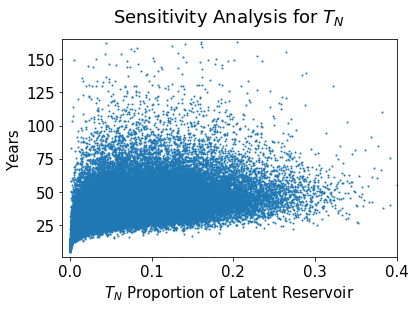

In [23]:
plt.title(r'Sensitivity Analysis for $T_N$', y = 1.05)
plt.xlim([-.01,0.4])
plt.ylim([1,165])
plt.xlabel(r'$T_N$ Proportion of Latent Reservoir' )
plt.ylabel('Years')

plt.scatter(parameter_arr.T[0], hy_arr['hy'], s = 1)







In [33]:
T_n = np.sort(parameter_arr.T[0]).reshape(500,100)
T_n_sort = np.argsort(parameter_arr.T[0])
T_n_hy = hy_arr['hy'][T_n_sort].reshape(500,100)

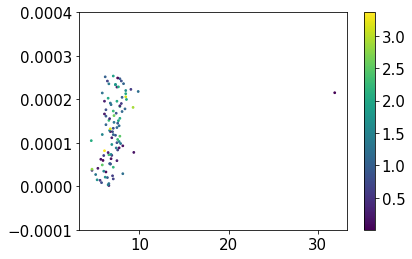

In [69]:
plt.scatter( T_n_hy[:1],T_n[:1], c = parameter_arr.T[15].reshape(500,100)[:1], s = 3)
plt.ylim([-0.0001, 0.0004])
plt.colorbar()

In [159]:
spearmanr(T_n_hy[5], parameter_arr.T[12].reshape(500,100)[0])

SpearmanrResult(correlation=-0.06912258529141604, pvalue=0.49438354478167723)

In [140]:
param = np.zeros([10, 50000])
for i in range(6):
    param[i,:] = parameter_arr.T[i*2,:]
for i in range(0,4):
    param[i+6,:] = parameter_arr.T[i+12,:]

In [191]:
n = 60
tmp = param[:,n*100:(n+1)*100]

In [192]:
spr_corr = spearmanr(tmp.T, T_n_hy[n])

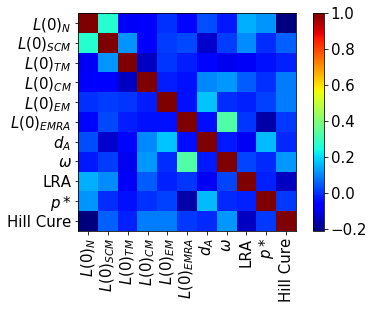

In [193]:
plt.imshow(spr_corr[0], cmap = 'jet')
label_param = [r'$L(0)_N$', r'$L(0)_{SCM}$', r'$L(0)_{TM}$',r'$L(0)_{CM}$',r'$L(0)_{EM}$',r'$L(0)_{EMRA}$',r'$d_A$', r'$\omega$', 'LRA', r'$p*$', 'Hill Cure']
plt.xticks(np.linspace(0,10,11), label_param, rotation='vertical')
plt.yticks(np.linspace(0,10,11), label_param, rotation='horizontal')
plt.colorbar()

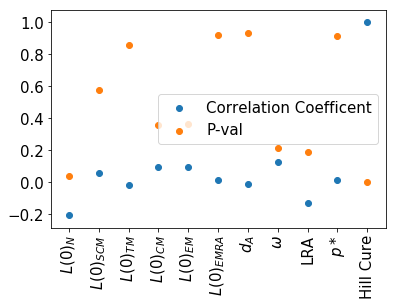

In [194]:
plt.scatter(np.linspace(0,10,11),spr_corr[0][-1], label = 'Correlation Coefficent')
plt.scatter(np.linspace(0,10,11),spr_corr[1][-1], label = 'P-val')
plt.xticks(np.linspace(0,10,11), label_param, rotation='vertical')
plt.legend()


In [288]:
tmp_list = []
tmp_what = []
for n in range(500):
    tmp = param[:,n*100:(n+1)*100]
    spr_corr = spearmanr(tmp.T, T_n_hy[n])
    p_vals = spr_corr[1][-1][:10]
    cc = spr_corr[0][-1][:10]
    
    if np.sum(p_vals < 0.01) > 0:
        tmp_list.append(n)
        tmp_what.append(np.where(p_vals<0.01)[0][0])
        if np.sum(p_vals<0.01) > 1:
            tmp_what.append(np.where(p_vals<0.01)[0][1])

([<matplotlib.axis.XTick at 0x7f84f8052c88>,
 <a list of 10 Text xticklabel objects>)

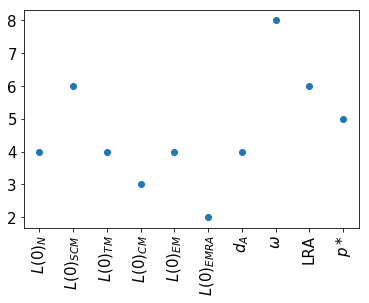

In [290]:
#x = plt.hist(tmp_what, bins = 10)
plt.scatter(np.linspace(0,9,10),x[0])
plt.xticks(np.linspace(0,9,10), label_param[:10], rotation='vertical')